In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape

np.random.shuffle(data)
print(f'Examples: {m} Features & Target: {n}')

Examples: 42000 Features & Target: 785


In [5]:
# Change the data such that each column is an example - (784, 42000)
data_val = data[0:1000, :].T
X_dev = data_val[1:n, :]
Y_dev = data_val[0, :]

In [6]:
data_train = data[1000:m, :].T
X_train = data_train[1:n, :]
X_train = X_train / 255.0

Y_train = data_train[0, :]

In [7]:
print(f'Train data: {X_train.shape} Train labels: {Y_train.shape}')
print(f'Dev set data: {X_dev.shape} Test labels: {Y_dev.shape}')

Train data: (784, 41000) Train labels: (41000,)
Dev set data: (784, 1000) Test labels: (1000,)


In [8]:
def ReLU(Z):
    return np.maximum(Z,0)

def derivative_ReLU(Z):
    return Z > 0

def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)

def init_params(size):
    W1 = np.random.rand(10, size) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1,b1,W2,b2

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1 #10, m
    A1 = ReLU(Z1) # 10,m
    Z2 = W2.dot(A1) + b2 #10,m
    A2 = softmax(Z2) #10,m
    return Z1, A1, Z2, A2

def one_hot(Y, num_classes=10):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def backward_propagation(X, Y, A1, A2, W2, W1, Z1, m, lambda_):
    one_hot_Y = one_hot(Y)
    # Derivative of categorical cross entropy & softmax is just (A2 - y)
    dZ2 = (A2 - one_hot_Y) # 10, m
    # Using Regularisation
    dW2 = 1/m * (dZ2.dot(A1.T)) - (lambda_/m) * W2# 10, 10
    db2 = 1/m * np.sum(dZ2,1)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1) # 10, m
    dW1 = 1/m * (dZ1.dot(X.T)) - (lambda_/m) * W1 #10, 784
    db1 = 1/m * np.sum(dZ1,1)

    return dW1, db1, dW2, db2

def update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 = W1 - alpha * dW1 
    b1 = b1 - alpha * np.reshape(db1, (10,1)) 
    W2 = W2 - alpha * dW2 
    b2 = b2 - alpha * np.reshape(db2, (10,1))

    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/Y.size

def get_loss(A2, Y):
    one_hot_Y = one_hot(Y)
    epsilon = 1e-8  # to avoid log(0)
    loss = - np.sum(one_hot_Y * np.log(A2 + epsilon)) / len(Y)
    return loss

def gradient_descent(X, Y, alpha, iterations, batch_size, lambda_):
    size , m = X.shape
    back_props = math.floor(m // batch_size)
    W1, b1, W2, b2 = init_params(size)
    loss_history = []
    for i in range(iterations):
        # Mini batch gradient descent
        for j in range(back_props):
            start_point =  int(batch_size*j)
            
            X_batch = X[:, start_point : start_point + batch_size]
            Y_batch = Y[start_point : start_point + batch_size]
            
            Z1, A1, Z2, A2 = forward_propagation(X_batch, W1, b1, W2, b2)
        
            dW1, db1, dW2, db2 = backward_propagation(X_batch, Y_batch, A1, A2, W2, W1, Z1, batch_size, lambda_)

            W1, b1, W2, b2 = update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2)   
        loss_history.append(get_loss(A2, Y_batch))
        if (i+1) % int(iterations/10) == 0:
            print(f"Iteration: {i+1} / {iterations}")
            prediction = get_predictions(A2)
            print(f'{get_accuracy(prediction, Y_batch):.3%}')
    return W1, b1, W2, b2, loss_history


In [9]:
W1, b1, W2, b2, loss_history = gradient_descent(X_train, Y_train, alpha=0.15, iterations=100, batch_size=64, lambda_= 0.001)

Iteration: 10 / 100
93.750%
Iteration: 20 / 100
95.312%
Iteration: 30 / 100
95.312%
Iteration: 40 / 100
95.312%
Iteration: 50 / 100
95.312%
Iteration: 60 / 100
95.312%
Iteration: 70 / 100
95.312%
Iteration: 80 / 100
95.312%
Iteration: 90 / 100
95.312%
Iteration: 100 / 100
95.312%


In [10]:
def make_predictions(X_test, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X_test, W1, b1, W2, b2)
    prediction = np.argmax(A2, 0)
    return prediction

In [11]:
X_dev_scaled = X_dev / 255
Y_dev_pred = make_predictions(X_dev_scaled, W1, b1, W2, b2)
print(f'Accuracy on validation set = {get_accuracy(Y_dev_pred, Y_dev)}')

Accuracy on validation set = 0.924


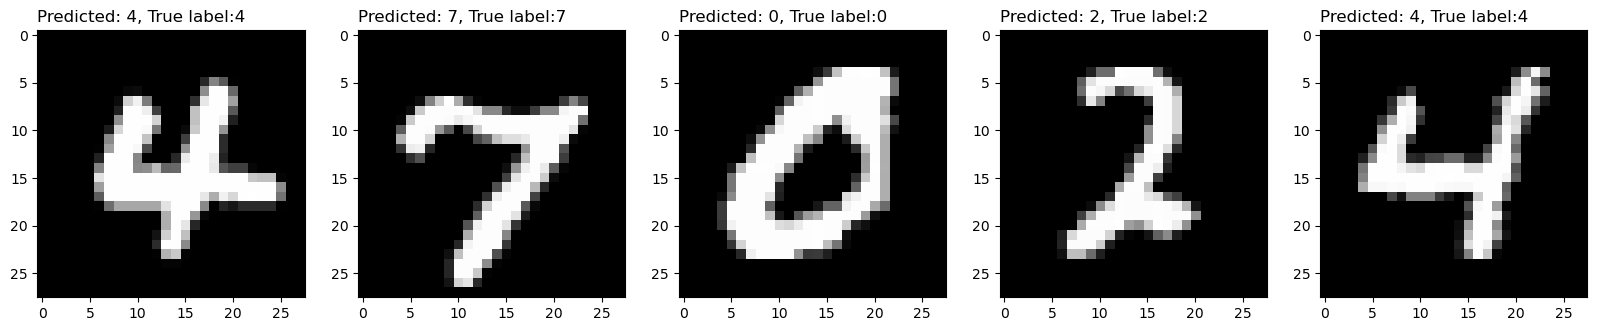

In [12]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 20))
for i, axis in enumerate(axes):

    # Reshape the flattened image to 28x28
    image_array = np.reshape(X_dev[:, i], (28, 28))

    # If not already uint8, convert it
    image_array = image_array.astype(np.uint8)

    # Display using matplotlib
    axis.imshow(image_array, cmap='gray')
    axis.set_title(f'Predicted: {Y_dev_pred[i]}, True label:{Y_dev[i]}', loc='left')
plt.show()


In [13]:
def adam_optimiser(dW1, db1, dW2, db2,
                   Vdw1_prev, Vdb1_prev, Vdw2_prev, Vdb2_prev,
                   Sdw1_prev, Sdb1_prev, Sdw2_prev, Sdb2_prev,
                   beta1, beta2, t, epsilon=1e-8):

    # Update momentum (1st moment)
    Vdw1 = beta1 * Vdw1_prev + (1 - beta1) * dW1
    Vdb1 = beta1 * Vdb1_prev + (1 - beta1) * np.reshape(db1, (10,1))
    Vdw2 = beta1 * Vdw2_prev + (1 - beta1) * dW2
    Vdb2 = beta1 * Vdb2_prev + (1 - beta1) * np.reshape(db2, (10,1))
 
    # Update RMS (2nd moment)
    Sdw1 = beta2 * Sdw1_prev + (1 - beta2) * (dW1 ** 2)
    Sdb1 = beta2 * Sdb1_prev + (1 - beta2) * (np.reshape(db1, (10,1)) ** 2)
    Sdw2 = beta2 * Sdw2_prev + (1 - beta2) * (dW2 ** 2)
    Sdb2 = beta2 * Sdb2_prev + (1 - beta2) * (np.reshape(db2, (10,1)) ** 2)
    
    # Bias correction
    Vdw1_corr = Vdw1 / (1 - beta1 ** t)
    Vdb1_corr = Vdb1 / (1 - beta1 ** t)
    Vdw2_corr = Vdw2 / (1 - beta1 ** t)
    Vdb2_corr = Vdb2 / (1 - beta1 ** t)

    Sdw1_corr = Sdw1 / (1 - beta2 ** t)
    Sdb1_corr = Sdb1 / (1 - beta2 ** t)
    Sdw2_corr = Sdw2 / (1 - beta2 ** t)
    Sdb2_corr = Sdb2 / (1 - beta2 ** t)

    # Compute parameter updates
    dW1_update = Vdw1_corr / (np.sqrt(Sdw1_corr) + epsilon)
    db1_update = Vdb1_corr / (np.sqrt(Sdb1_corr) + epsilon)
    dW2_update = Vdw2_corr / (np.sqrt(Sdw2_corr) + epsilon)
    db2_update = Vdb2_corr / (np.sqrt(Sdb2_corr) + epsilon)
    
    return dW1_update, db1_update, dW2_update, db2_update, Vdw1, Vdb1, Vdw2, Vdb2, Sdw1, Sdb1, Sdw2, Sdb2


In [14]:
def gradient_descent_with_adam(X, Y, alpha, iterations, batch_size, lambda_):
    size, m = X.shape
    back_props = math.floor(m // batch_size)
    loss_history_adam = []
    # Initialize weights and biases
    W1, b1, W2, b2 = init_params(size)

    # Initialize Adam moment terms
    Vdw1 = np.zeros_like(W1)
    Vdb1 = np.zeros_like(b1)
    Vdw2 = np.zeros_like(W2)
    Vdb2 = np.zeros_like(b2)

    Sdw1 = np.zeros_like(W1)
    Sdb1 = np.zeros_like(b1)
    Sdw2 = np.zeros_like(W2)
    Sdb2 = np.zeros_like(b2)

    t = 1  # timestep for Adam bias correction

    for i in range(iterations):

        for j in range(back_props):
            start_point = j * batch_size
            end_point = start_point + batch_size

            X_batch = X[:, start_point : start_point + batch_size]
            Y_batch = Y[start_point : start_point + batch_size]

            Z1, A1, Z2, A2 = forward_propagation(X_batch, W1, b1, W2, b2)

            dW1, db1, dW2, db2 = backward_propagation(X_batch, Y_batch, A1, A2, W2, W1, Z1, batch_size, lambda_)

            # Adam optimizer step
            dW1_, db1_, dW2_, db2_, Vdw1, Vdb1, Vdw2, Vdb2, Sdw1, Sdb1, Sdw2, Sdb2 = adam_optimiser(
                dW1, db1, dW2, db2, 
                Vdw1, Vdb1, Vdw2, Vdb2,
                Sdw1, Sdb1, Sdw2, Sdb2,
                beta1=0.9, beta2=0.999, t=t, epsilon=1e-8
            )

            # Update parameters
            W1, b1, W2, b2 = update_params(alpha, W1, b1, W2, b2, dW1_, db1_, dW2_, db2_)
            t += 1  # increment Adam timestep
        
        loss_history_adam.append(get_loss(A2, Y_batch))
        # Print accuracy every 10% progress
        if (i + 1) % (iterations // 10) == 0:
            prediction = get_predictions(A2)
            print(f"Iteration {i+1}/{iterations} — Accuracy: {get_accuracy(prediction, Y_batch):.3%}")

    return W1, b1, W2, b2,  loss_history



In [15]:
W1_adam, b1_adam, W2_adam, b2_adam, loss_history_adam = gradient_descent_with_adam(X_train, Y_train, alpha=0.001, iterations=100, batch_size=64, lambda_= 0.0001)

Iteration 10/100 — Accuracy: 96.875%
Iteration 20/100 — Accuracy: 96.875%
Iteration 30/100 — Accuracy: 98.438%
Iteration 40/100 — Accuracy: 98.438%
Iteration 50/100 — Accuracy: 98.438%
Iteration 60/100 — Accuracy: 96.875%
Iteration 70/100 — Accuracy: 95.312%
Iteration 80/100 — Accuracy: 95.312%
Iteration 90/100 — Accuracy: 95.312%
Iteration 100/100 — Accuracy: 95.312%


In [16]:
X_dev_scaled = X_dev / 255
Y_dev_pred = make_predictions(X_dev_scaled, W1_adam, b1_adam, W2_adam, b2_adam)
print(f'Accuracy on validation set = {get_accuracy(Y_dev_pred, Y_dev)}')

Accuracy on validation set = 0.912


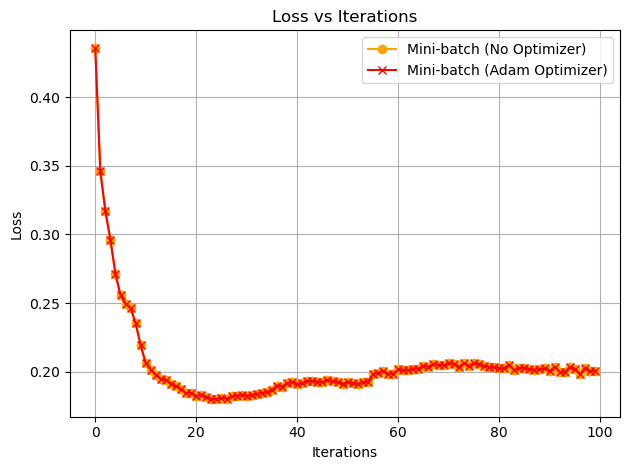

In [22]:
# Plot
plt.plot(np.arange(len(loss_history)), loss_history, label='Mini-batch (No Optimizer)', marker='o', color='orange')
plt.plot(np.arange(len(loss_history_adam)), loss_history_adam, label='Mini-batch (Adam Optimizer)', marker='x', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()